In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from curated_set_services import CuratedSet
from pynucl.hist_features import hist_shf4seq
from pytexshade import ipyshade

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/Bio/Align/substitution_matrices/__init__.py:21: BiopythonExperimentalWarning: Bio.Align.substitution_matrices is an experimental module which may still undergo significant changes. In particular, the location of this module may change, and the Array class defined in this module may be moved to other existing or new modules in Biopython.
  BiopythonExperimentalWarning)


_ColormakerRegistry()

In [3]:
curated_set = CuratedSet()

In [4]:
curated_set.data.head()

,accession,type,variant,subvariant,doublet,gi,geneid,taxonomyid,organism,phylum,class,info,References,sequence
XP_011215280.1,XP_011215280.1,H2A,canonical_H2A,,,752439274,,9646,Ailuropoda melanoleuca,,Mammalia,,,MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...
XP_011216221.1,XP_011216221.1,H2B,canonical_H2B,,,752441783,,9646,Ailuropoda melanoleuca,,Mammalia,,,MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVL...
XP_011215272.1,XP_011215272.1,H2A,H2A.B,,,752439251,,9646,Ailuropoda melanoleuca,,Mammalia,,,MPGDRSRRGSSSGQRRTRSRTARAELSFSVSHVERLLREGHYAQRL...
XP_002927211.1,XP_002927211.1,H2A,H2A.L,,,301783589,,9646,Ailuropoda melanoleuca,,Mammalia,,,MSGRRSPWHSHQHKRHGLSRSMRAELQFPVSRVDRLLREGCYAQRL...
XP_002913536.1,XP_002913536.1,H2A,H2A.P,,,301755368,,9646,Ailuropoda melanoleuca,,Mammalia,,,MSGKKSHESSYQTQAHLITTELQVPVSYVDRLLQENQYNHPLSSST...


In [5]:
curated_set.data.tail()

,accession,type,variant,subvariant,doublet,gi,geneid,taxonomyid,organism,phylum,class,info,References,sequence
NONCBI_H3Y_5,NONCBI_H3Y_5,H3,H3.Y,,,NOGI,,9606,Homo sapiens,,Mammalia,,,AVAMAGMTQVLVWELHHCPCFLTPVLPAAGQAQPQRGESTRPHNMA...
NONCBI_H3Y_6,NONCBI_H3Y_6,H3,H3.Y,,,NOGI,,9544,Macaca mulatta,,Mammalia,,,ARTKQTARKATNWQAPRKPLATKAAAKRAPPRGGIKKPHRYKPGTQ...
NONCBI_H3Y_7,NONCBI_H3Y_7,H3,H3.Y,,,NOGI,,9544,Macaca mulatta,,Mammalia,,,ARTKQTARKATNWQAPRKPLATKAPGKRLPPRGGIKKPHRYRPGTQ...
NONCBI_H3Y_2,NONCBI_H3Y_2,H3,H3.Y,,,NOGI,,9598,Pan troglodytes,,Mammalia,,,ARTKQTARKATAWQAPRKPLATKAAGKRAPPTGGIKKPHRYKPGTL...
NONCBI_H3Y_3,NONCBI_H3Y_3,H3,H3.Y,,,NOGI,,9598,Pan troglodytes,,Mammalia,,,ARTKQTARKATAWQAPRKPLATKAARKRASPTGGIKKPHRYKPGTL...


## Multiple Sequence Alignment with visualization

In [6]:
from Bio.Align.AlignInfo import SummaryInfo

In [7]:
df = curated_set.data.loc[curated_set.data['organism']=='Arabidopsis thaliana']
df = df.loc[curated_set.data['variant']=='canonical_H2A']
# df = df[df['variant'].str.startswith('canonical', na=False)]
msa = curated_set.muscle_aln(accessions=list(df['accession']))
msa

>NP_001190852.1 histone H2A
MAGRGKQLGSGAAKKSTSRSSKAGLQFPVGRIARFLKAGKYAERVGAGAPVYLAAVLEYL
AAEVLELAGNAARDNKKTRIVPRHIQLAVRNDEELSKLLGDVTIANGGVMPNIHNLLLPK
KAGSSKPTEED

>NP_175517.1 histone H2A
MAGRGKTLGSGSAKKATTRSSKAGLQFPVGRIARFLKKGKYAERVGAGAPVYLAAVLEYL
AAEVLELAGNAARDNKKTRIVPRHIQLAVRNDEELSKLLGDVTIANGGVMPNIHNLLLPK
KTGASKPSAEDD

>NP_188703.1 histone H2A
MAGRGKTLGSGVAKKSTSRSSKAGLQFPVGRIARFLKNGKYATRVGAGAPVYLAAVLEYL
AAEVLELAGNAARDNKKTRIVPRHIQLAVRNDEELSKLLGDVTIANGGVMPNIHSLLLPK
KAGASKPSADED

>NP_200275.1 histone H2A
MAGRGKTLGSGGAKKATSRSSKAGLQFPVGRIARFLKAGKYAERVGAGAPVYLAAVLEYL
AAEVLELAGNAARDNKKTRIVPRHIQLAVRNDEELSKLLGDVTIANGGVMPNIHNLLLPK
KAGASKPQED



<<class 'Bio.Align.MultipleSeqAlignment'> instance (4 records of length 132, SingleLetterAlphabet()) at 7fb36e52fd30>

In [10]:
a=SummaryInfo(msa)
cons=a.dumb_consensus(threshold=0.1, ambiguous='X')
features = hist_shf4seq(cons)

tempfile created:  /tmp/tmpni1v0r0u.png
Created temporaty directory:  /tmp/tmp3cjga4ko
Created temporaty directory:  /tmp/tmpsgl12rys
Chosen splitting parameters
4 20
DEBUG: copying fasta file in current folder for analysis
mkdir -p debug && cp /tmp/tmpsgl12rys/alignment0.fasta debug/alignment0.fasta
{'1': '\\feature{bottom}{1}{17..24}{helix}{alpha1ext}\\feature{bottom}{1}{28..39}{helix}{$\\alpha 1$}\\feature{bottom}{1}{48..75}{helix}{$\\alpha 2$}\\feature{bottom}{1}{81..91}{helix}{$\\alpha 3$}\\feature{bbottom}{1}{41..47}{loop}{loopL1}\\feature{bbottom}{1}{76..80}{loop}{loopL2}\\feature{bottom}{1}{44..45}{-->}{$\\beta 1$}\\feature{bottom}{1}{79..80}{-->}{$\\beta 2$}\\feature{bottom}{1}{102..104}{-->}{beta3}\\frameblock{1}{44..44}{Blue[1.5pt]}\\frameblock{1}{79..79}{Blue[1.5pt]}'}
Features code: 
DEBUG: copying tex file in current folder for analysis
mkdir -p debug && cp /tmp/tmpsgl12rys/align.tex debug/align.tex
Launcning Tectonic:
tectonic /tmp/tmpsgl12rys/align.tex 2>&1
note: this i

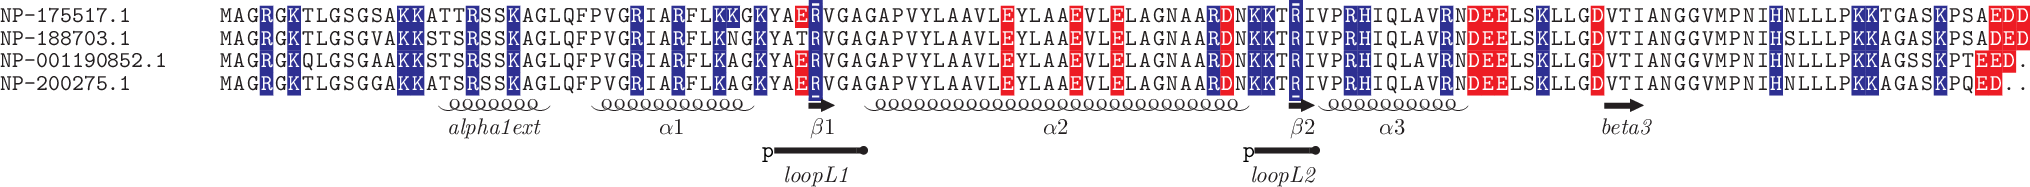

In [9]:
ipyshade.shadedmsa(msa,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=features,title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=False, # Add a ruler\
     show_seq_names=True,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     debug=True
    )

## Phylogenetic tree

In [11]:
!FastTree draft_seeds/H3/H3.Y.fasta > tree_file

FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: draft_seeds/H3/H3.Y.fasta
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Ignored unknown character X (seen 1 times)
Initial topology in 0.00 seconds
Refining topology: 13 rounds ME-NNIs, 2 rounds ME-SPRs, 6 rounds ML-NNIs
Total branch-length 0.599 after 0.01 sec
ML-NNI round 1: LogLk = -947.821 NNIs 3 max delta 0.00 Time 0.06
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.712 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -924.902 NNIs 3 max delta 0.00 Time 0.13
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -9

In [12]:
from ete3 import Tree

# Loads a tree structure from a newick string. The returned variable ’t’ is the root node for the tree.

# Load a tree structure from a newick file.
t = Tree("tree_file")
print(t)


   /-Homo|EAX08008.1|H3.Y
  |
  |   /-root|NOGI_6|H3.Y
  |--|
  |   \-root|NOGI_7|H3.Y
--|
  |      /-root|NOGI_5|H3.Y
  |   /-|
  |  |  |   /-Homo|NP_001358848.1|H3.Y
  |  |   \-|
   \-|      \-root|NOGI_4|H3.Y
     |
     |   /-root|NOGI_3|H3.Y
      \-|
        |   /-Homo|NP_001342187.1|H3.Y
         \-|
           |   /-root|NOGI_1|H3.Y
            \-|
               \-root|NOGI_2|H3.Y


## Updating accession versions

In [4]:
curated_set.update_accession_version()
curated_set.data.shape

/home/l_singh/.conda/envs/histdb_env/lib/python3.8/site-packages/Bio/Entrez/__init__.py:658: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(
/home/l_singh/.conda/envs/histdb_env/lib/python3.8/site-packages/Bio/GenBank/__init__.py:1143: BiopythonParserWarning: Dropping bond qualifier in feature location
  warnings.warn(


NP_034507 changes to NP_034507.2


/mnt/scratch/l_singh/hdb/histonedb/CURATED_SET/curated_set_sevices.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curated_data_with_acc['accession'] = new_accessions


(420, 12)

In [5]:
curated_set.save() #curated_set.save(filename='<filename>')

Previous data backuped to backups/histones.csv-Dec2421234523
Results saved to histones.csv


## Checking for duplicates

In [4]:
list(curated_set.has_duplicates())

[]

## Updating TAXIDs and organism

In [4]:
curated_set.update_taxids() #update only for blank data use blank_data=True, update for special accessions use accessions=[<list of accessions>]

/home/l_singh/.conda/envs/histdb_env/lib/python3.8/site-packages/Bio/Entrez/__init__.py:658: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(
/home/l_singh/.conda/envs/histdb_env/lib/python3.8/site-packages/Bio/GenBank/__init__.py:1143: BiopythonParserWarning: Dropping bond qualifier in feature location
  warnings.warn(
/mnt/scratch/l_singh/hdb/histonedb/CURATED_SET/curated_set_sevices.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
curated_set.data.head()

In [ ]:
curated_set.data.tail()

In [ ]:
curated_set.save()

## Fetching sequences from NCBI

In [ ]:
curated_set.update_sequence() #update only for blank data use blank_data=True

In [5]:
# access to fasta_seqrec dictionary
curated_set.fasta_seqrec

{'XP_011215280.1': SeqRecord(seq=Seq('MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAA...KGK'), id='XP_011215280.1', name='XP_011215280.1', description='XP_011215280.1 PREDICTED: histone H2A type 1-C [Ailuropoda melanoleuca]', dbxrefs=[]),
 'XP_011216221.1': SeqRecord(seq=Seq('MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTG...SSK'), id='XP_011216221.1', name='XP_011216221.1', description='XP_011216221.1 PREDICTED: histone H2B type 2-F [Ailuropoda melanoleuca]', dbxrefs=[]),
 'XP_011215272.1': SeqRecord(seq=Seq('MPGDRSRRGSSSGQRRTRSRTARAELSFSVSHVERLLREGHYAQRLGSSAPVFL...AWN'), id='XP_011215272.1', name='XP_011215272.1', description='XP_011215272.1 histone H2A-Bbd type 2/3 [Ailuropoda melanoleuca]', dbxrefs=[]),
 'XP_002927211.1': SeqRecord(seq=Seq('MSGRRSPWHSHQHKRHGLSRSMRAELQFPVSRVDRLLREGCYAQRLSSSTPVFL...RKC'), id='XP_002927211.1', name='XP_002927211.1', description='XP_002927211.1 PREDICTED: histone H2A-Bbd type 1 [Ailuropoda melanoleuca]', dbxrefs=[]),
 'XP_002913536.1': Se

In [6]:
curated_set.data.head()

,accession,type,variant,subvariant,doublet,gi,geneid,taxonomyid,organism,taxonomy_group,info,sequence
XP_011215280.1,XP_011215280.1,H2A,canonical_H2A,,,752439274,,9646,Ailuropoda melanoleuca,,,MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...
XP_011216221.1,XP_011216221.1,H2B,canonical_H2B,,,752441783,,9646,Ailuropoda melanoleuca,,,MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVL...
XP_011215272.1,XP_011215272.1,H2A,H2A.B,,,752439251,,9646,Ailuropoda melanoleuca,,,MPGDRSRRGSSSGQRRTRSRTARAELSFSVSHVERLLREGHYAQRL...
XP_002927211.1,XP_002927211.1,H2A,H2A.L,,,301783589,,9646,Ailuropoda melanoleuca,,,MSGRRSPWHSHQHKRHGLSRSMRAELQFPVSRVDRLLREGCYAQRL...
XP_002913536.1,XP_002913536.1,H2A,H2A.P,,,301755368,,9646,Ailuropoda melanoleuca,,,MSGKKSHESSYQTQAHLITTELQVPVSYVDRLLQENQYNHPLSSST...


In [ ]:
curated_set.save()

## Multiple Sequence Alignment

In [18]:
!muscle -version

MUSCLE v3.8.1551 by Robert C. Edgar


In [4]:
curated_set.muscle_aln_for_variant() #creates dict with msa for variants, stored in curated_set.msa_variant

Fetching 413 seqs


/home/l_singh/.conda/envs/histdb_env/lib/python3.8/site-packages/Bio/Entrez/__init__.py:658: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(


FASTA Records downloaded: 413
Creating FASTA Records for NONCBI sequences...
>XP_011216221.1 PREDICTED: histone H2B type 2-F [Ailuropoda melanoleuca]
MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTGISSKAM
GIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVT
KYTSSK

>sp|Q9FFC0.3|H2B10_ARATH RecName: Full=Histone H2B.10; AltName: Full=HTB2
MAKADKKPAEKKPAEKTPAAEPAAAAEKKPKAGKKLPKEPAGAGDKKKKRSKKNVETYKI
YIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLAGESSKLARYNKKPTITSREIQTAVR
LVLPGELAKHAVSEGTKAVTKFTSS

>sp|Q9LQQ4.3|H2B1_ARATH RecName: Full=Histone H2B.1; Short=HTB1
MAPRAEKKPAEKKTAAERPVEENKAAEKAPAEKKPKAGKKLPPKEAGDKKKKRSKKNVET
YKIYIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLAQESSKLARYNKKPTITSREIQT
AVRLVLPGELAKHAVSEGTKAVTKFTSS

>sp|Q9LZ45.3|H2B9_ARATH RecName: Full=Histone H2B.9; AltName: Full=HTB10
MAPKAEKKPAEKAPAPKAEKKIAKEGGTSEIVKKKKKTKKSTETYKIYIFKVLKQVHPDI
GISGKAMGIMNSFINDIFEKLAQESSRLARYNKKPTITSREIQTAVRLVLPGELAKHAVS
EGTKAVTKFTSS

>sp|Q9LZT0.3|H2B7_ARATH RecName: Full=Histone H2B.7; AltName: Full=HTB11

{'canonical_H2B': <<class 'Bio.Align.MultipleSeqAlignment'> instance (44 records of length 161) at 7fcd7872d0d0>,
 'H1.3': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 221) at 7fccf2f8fb50>,
 'H2B.S': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 126) at 7fccf267b3a0>,
 'H1.4': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 219) at 7fccf267b3d0>,
 'TS_H3.4': <<class 'Bio.Align.MultipleSeqAlignment'> instance (2 records of length 136) at 7fccf267b370>,
 'H2B.W': <<class 'Bio.Align.MultipleSeqAlignment'> instance (7 records of length 225) at 7fccf267b6d0>,
 'H3.Y': <<class 'Bio.Align.MultipleSeqAlignment'> instance (10 records of length 195) at 7fccf267b9d0>,
 'macroH2A': <<class 'Bio.Align.MultipleSeqAlignment'> instance (12 records of length 380) at 7fccf267be20>,
 'canonical_H3': <<class 'Bio.Align.MultipleSeqAlignment'> instance (37 records of length 137) at 7fccf267be80>,
 'generic_H1': <<class 'Bio.Align.

In [ ]:
a = curated_set.muscle_aln(accessions=['XP_011215280.1', 'XP_011216221.1', 'XP_011215272.1'])

## Generate seeds

In [ ]:
curated_set.generate_seeds()